In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [4]:
df=pd.read_csv("/content/vehicle.csv")
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [5]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [6]:
df.isnull().sum().sum()

41

In [7]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [8]:
df.fillna(df.median(),inplace=True)

<ipython-input-8-e1b8fa6d4ecf>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(),inplace=True)


In [9]:
df.isnull().sum().sum()

0

<ipython-input-10-c510bead15da>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


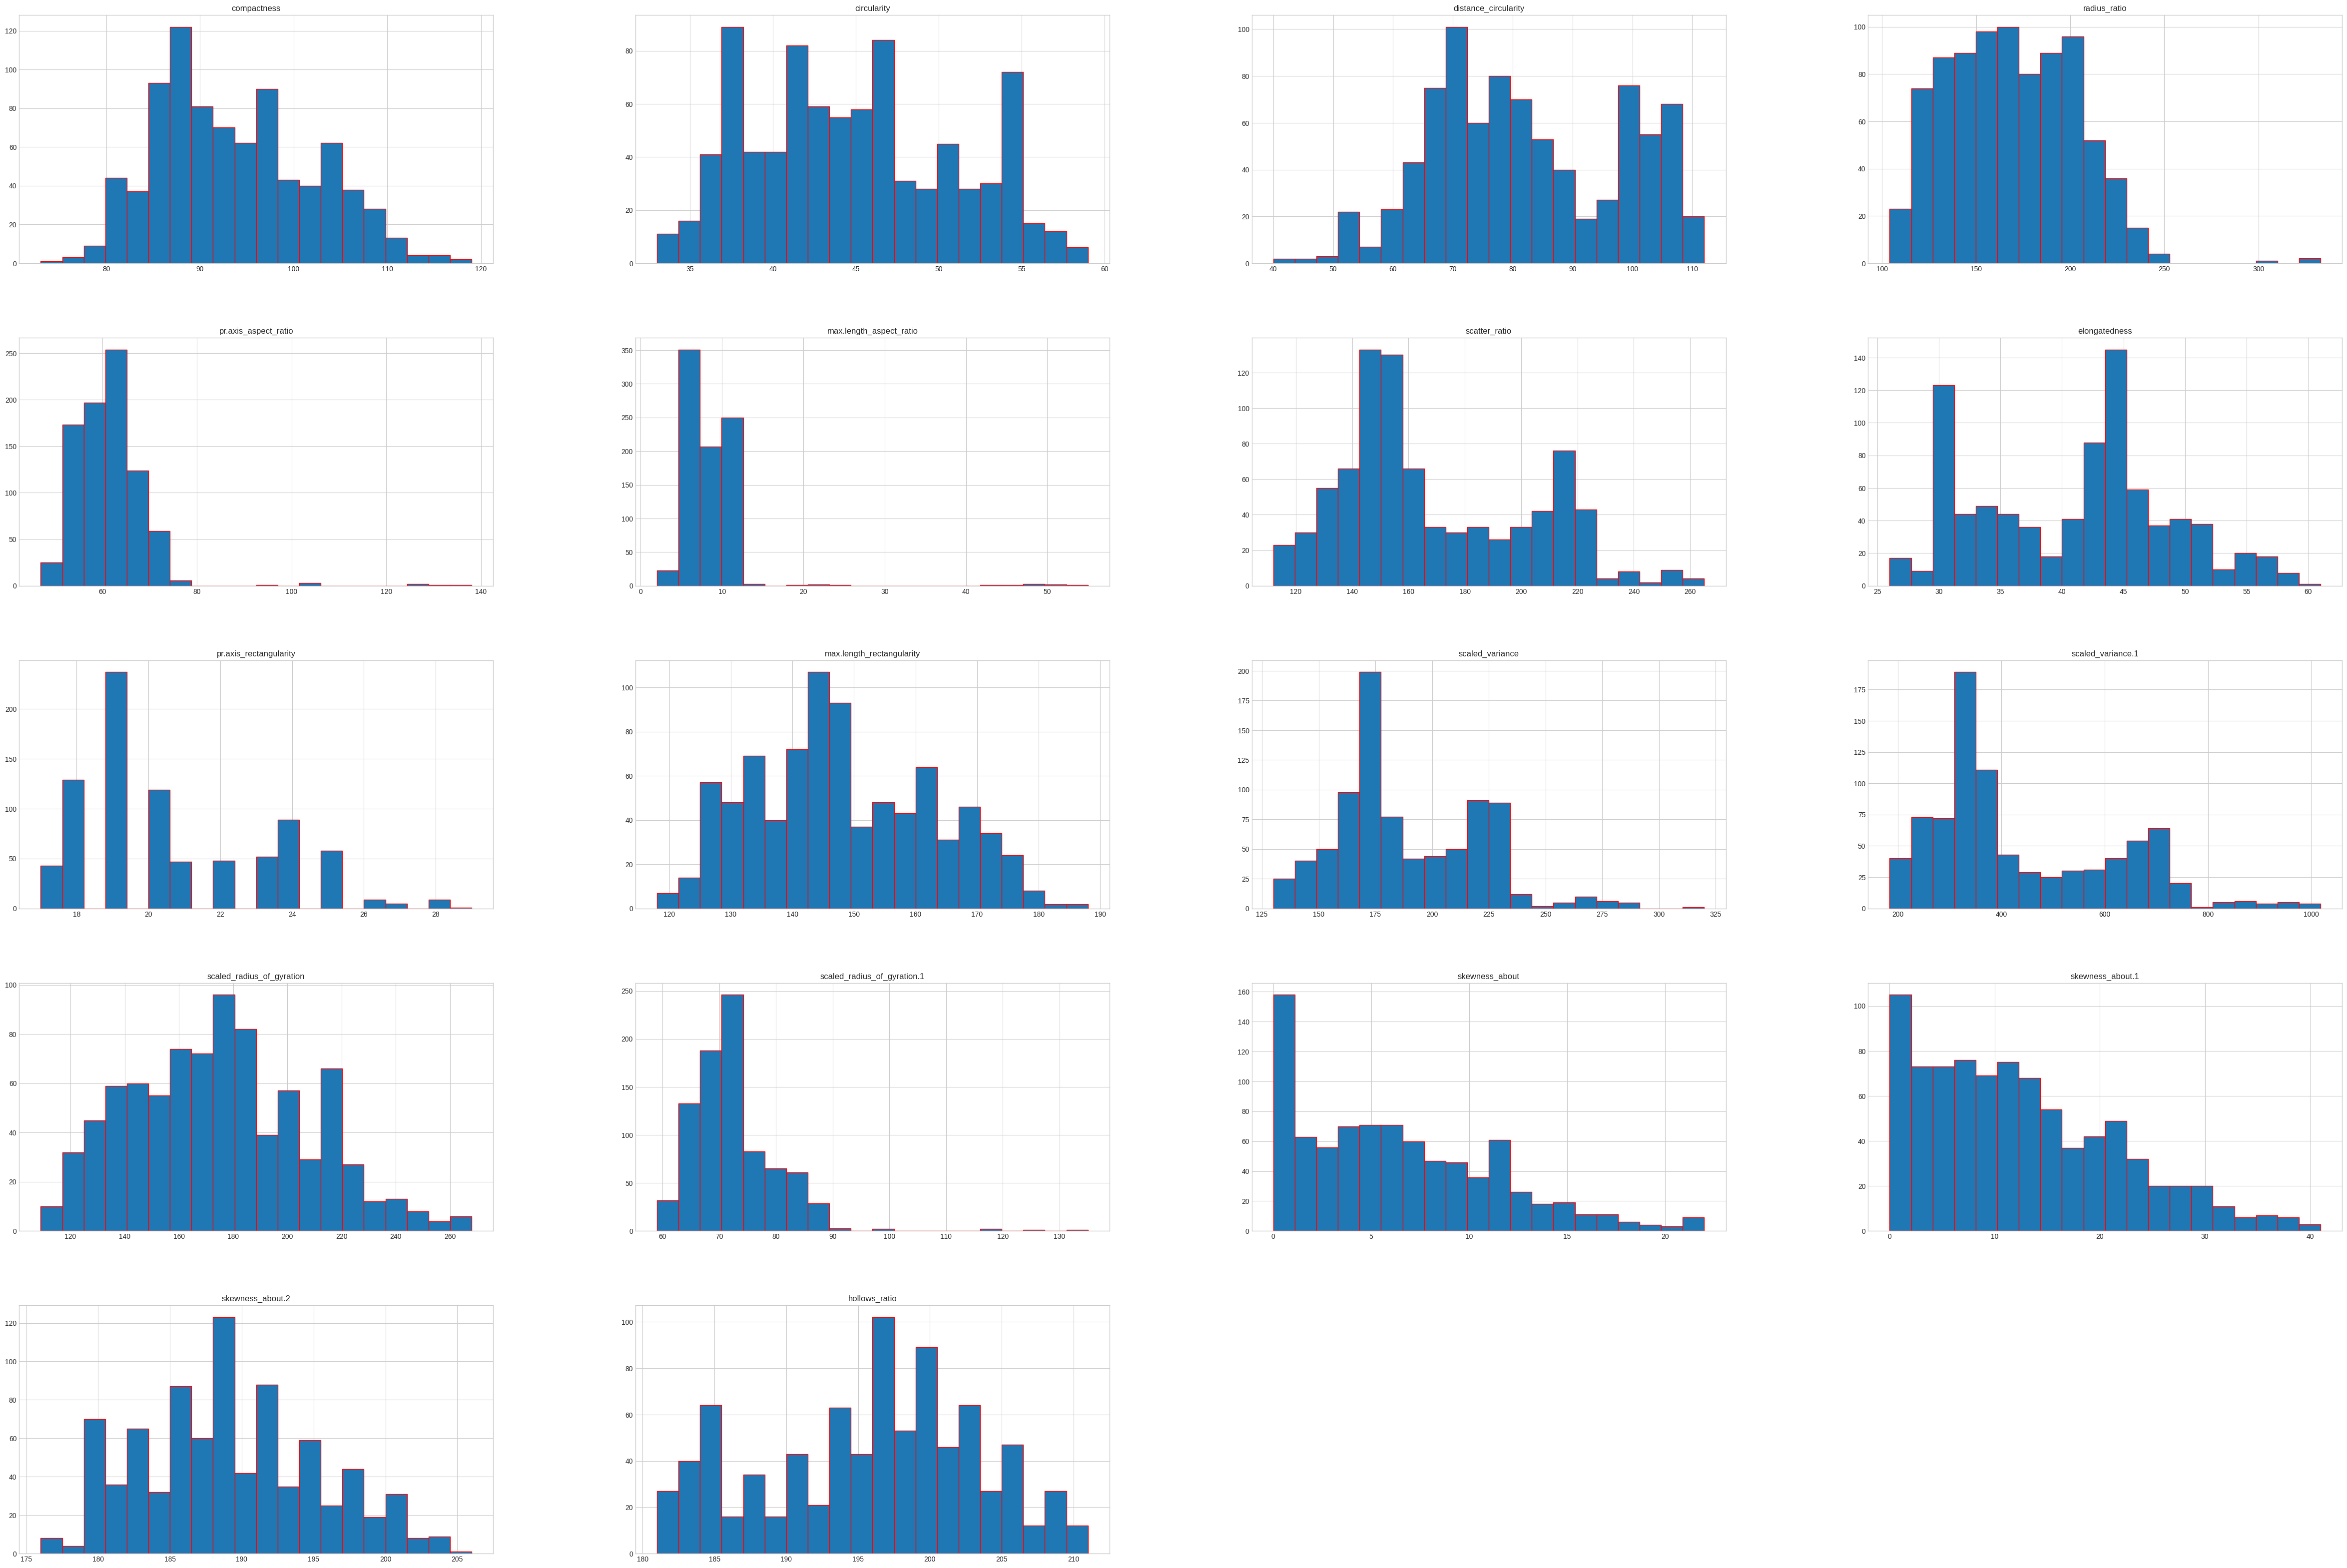

In [10]:
plt.style.use('seaborn-whitegrid')
df.hist(bins=20, figsize=(60,40),edgecolor = 'red')
plt.show()

<Axes: >

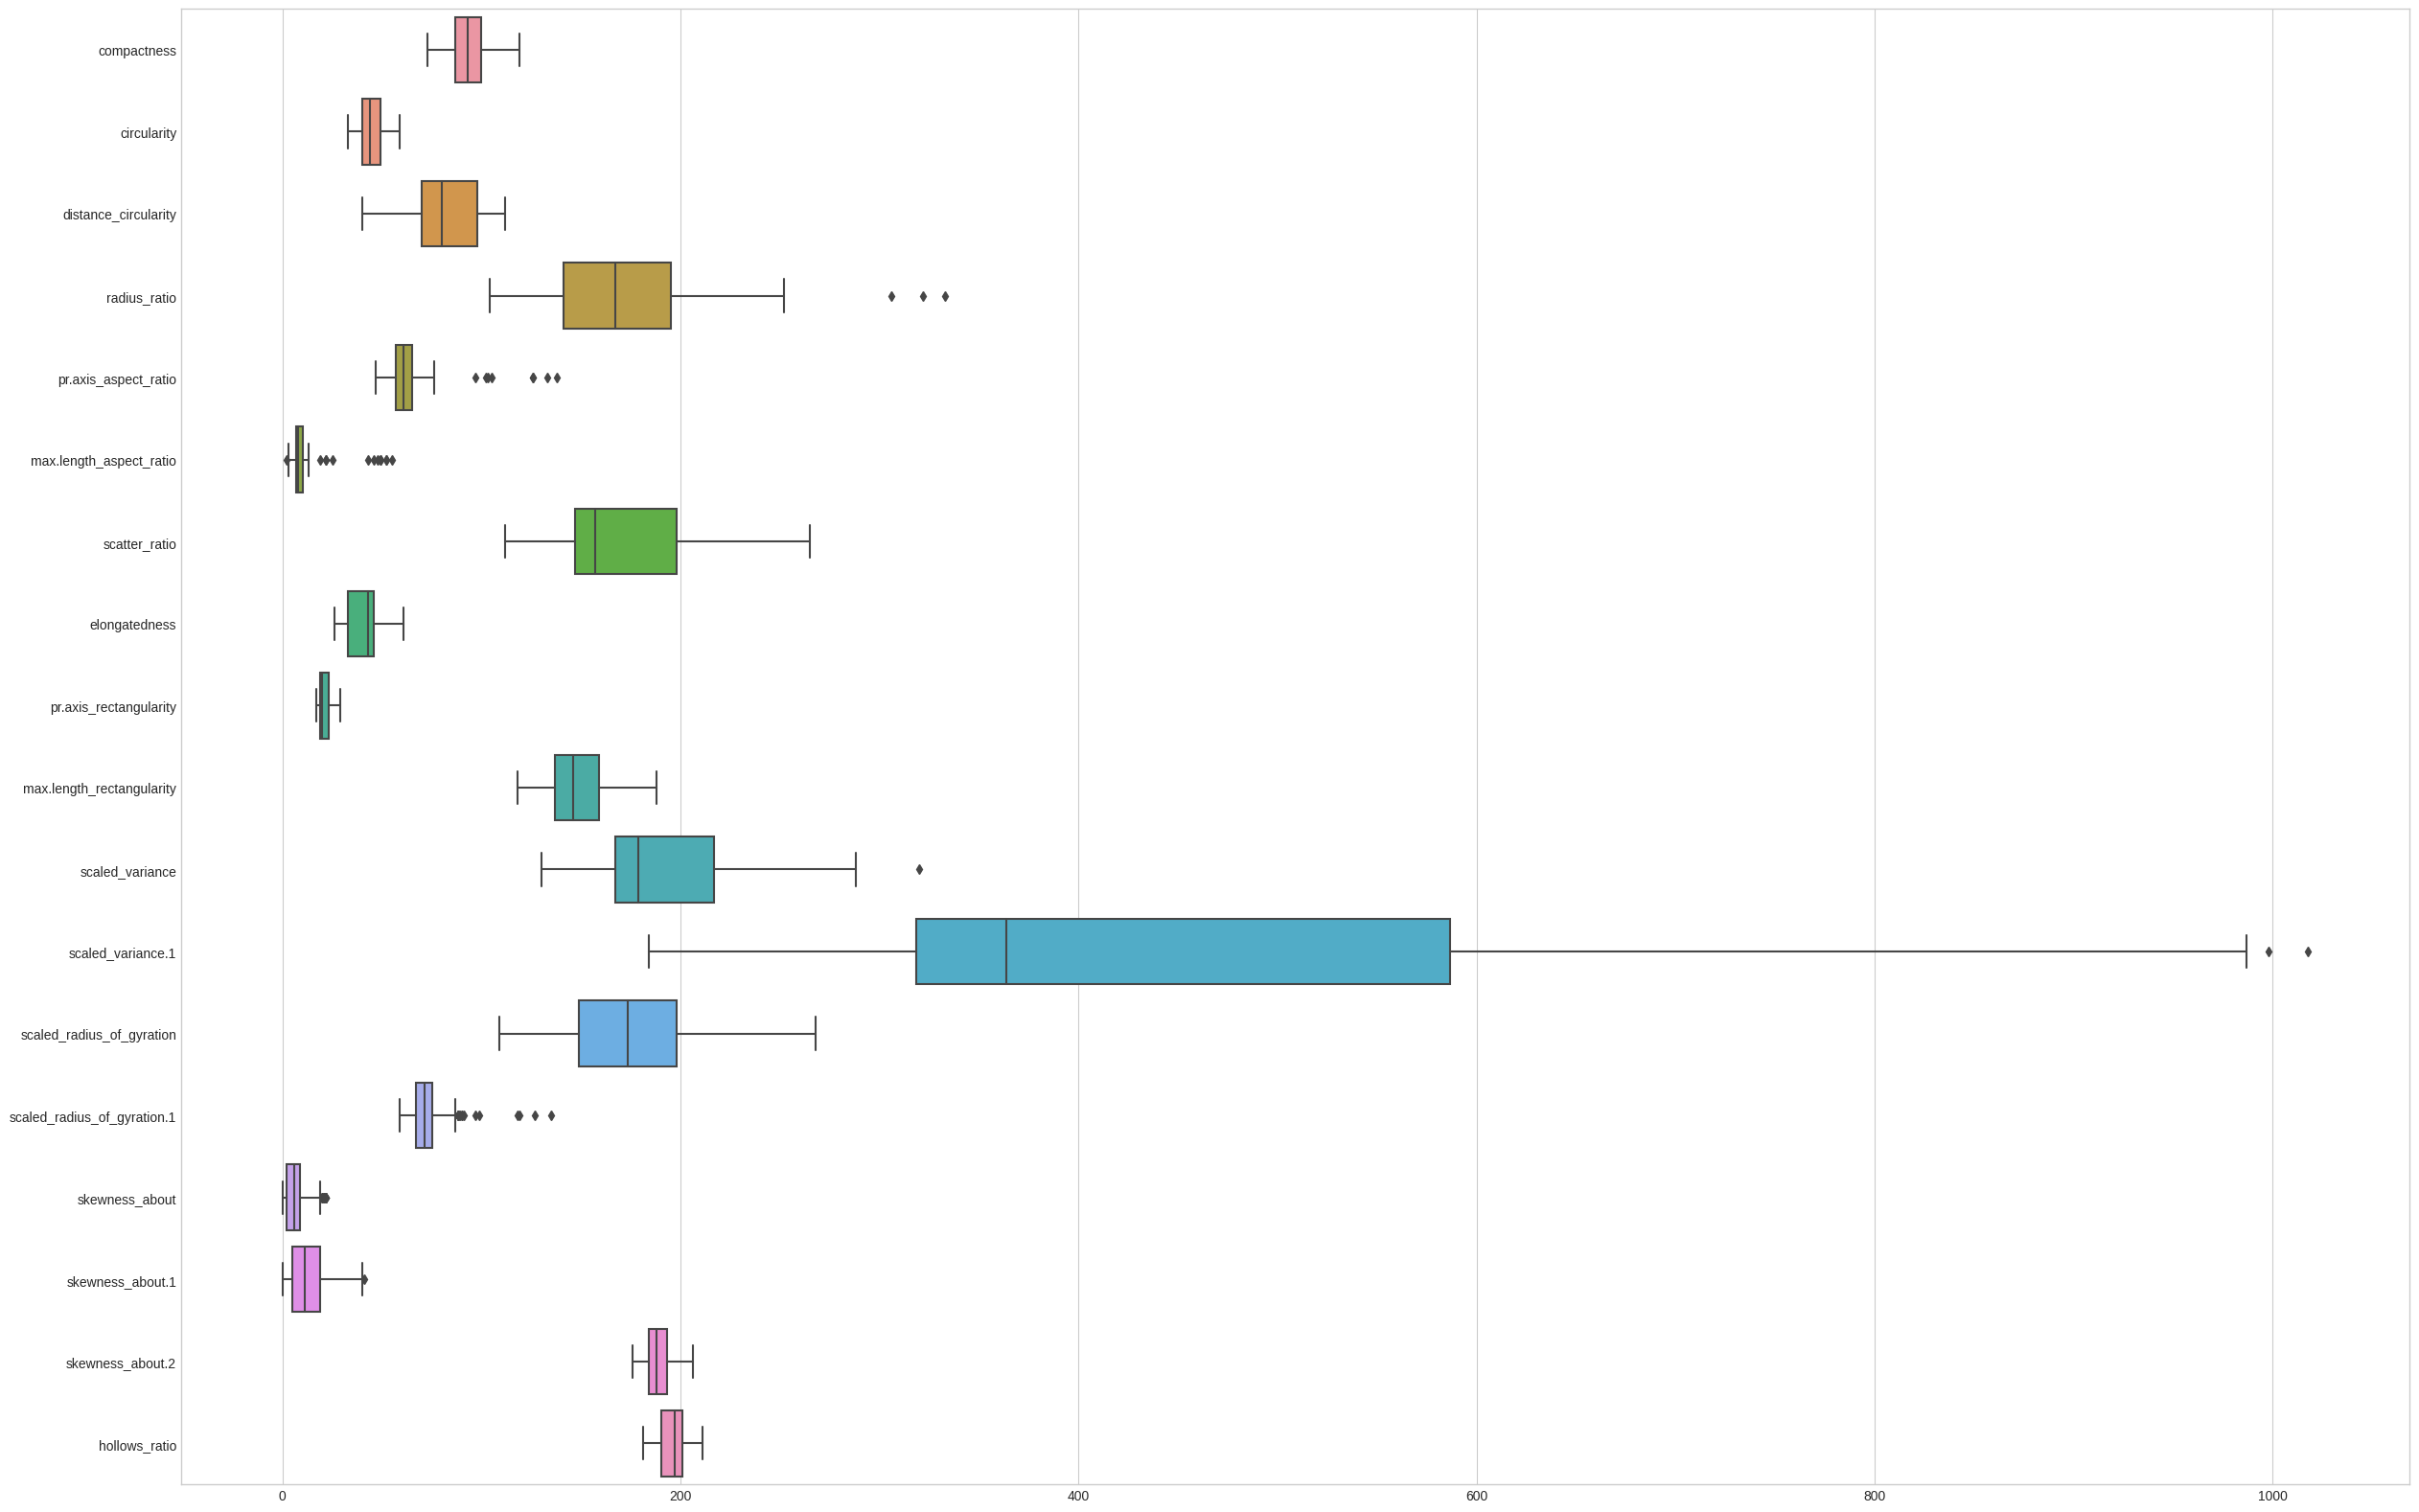

In [11]:
plt.figure(figsize= (30,20))
sns.boxplot(data=df,orient="h")

In [12]:
# scaled_varoiance.1 have huge data distributions and it is highly skewed. So we drop that attribute to optimize the
# model performance.
df.drop('scaled_variance.1',axis=1,inplace=True)

<ipython-input-13-fbc5124cb0b1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


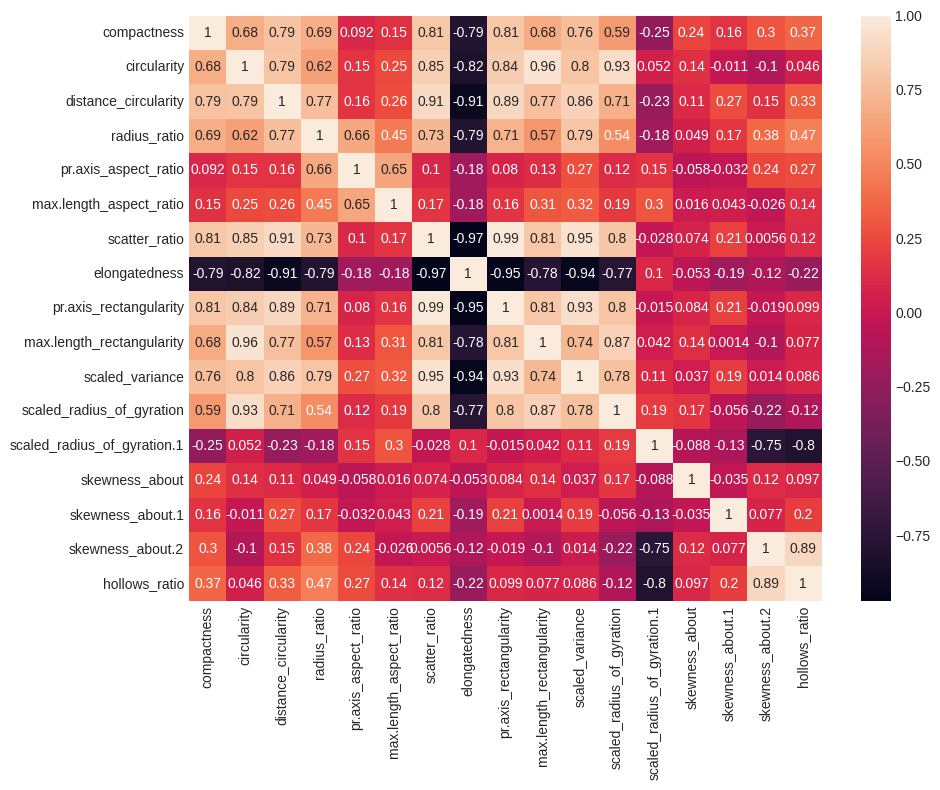

In [13]:
cor=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True)
plt.tight_layout()
plt.show()

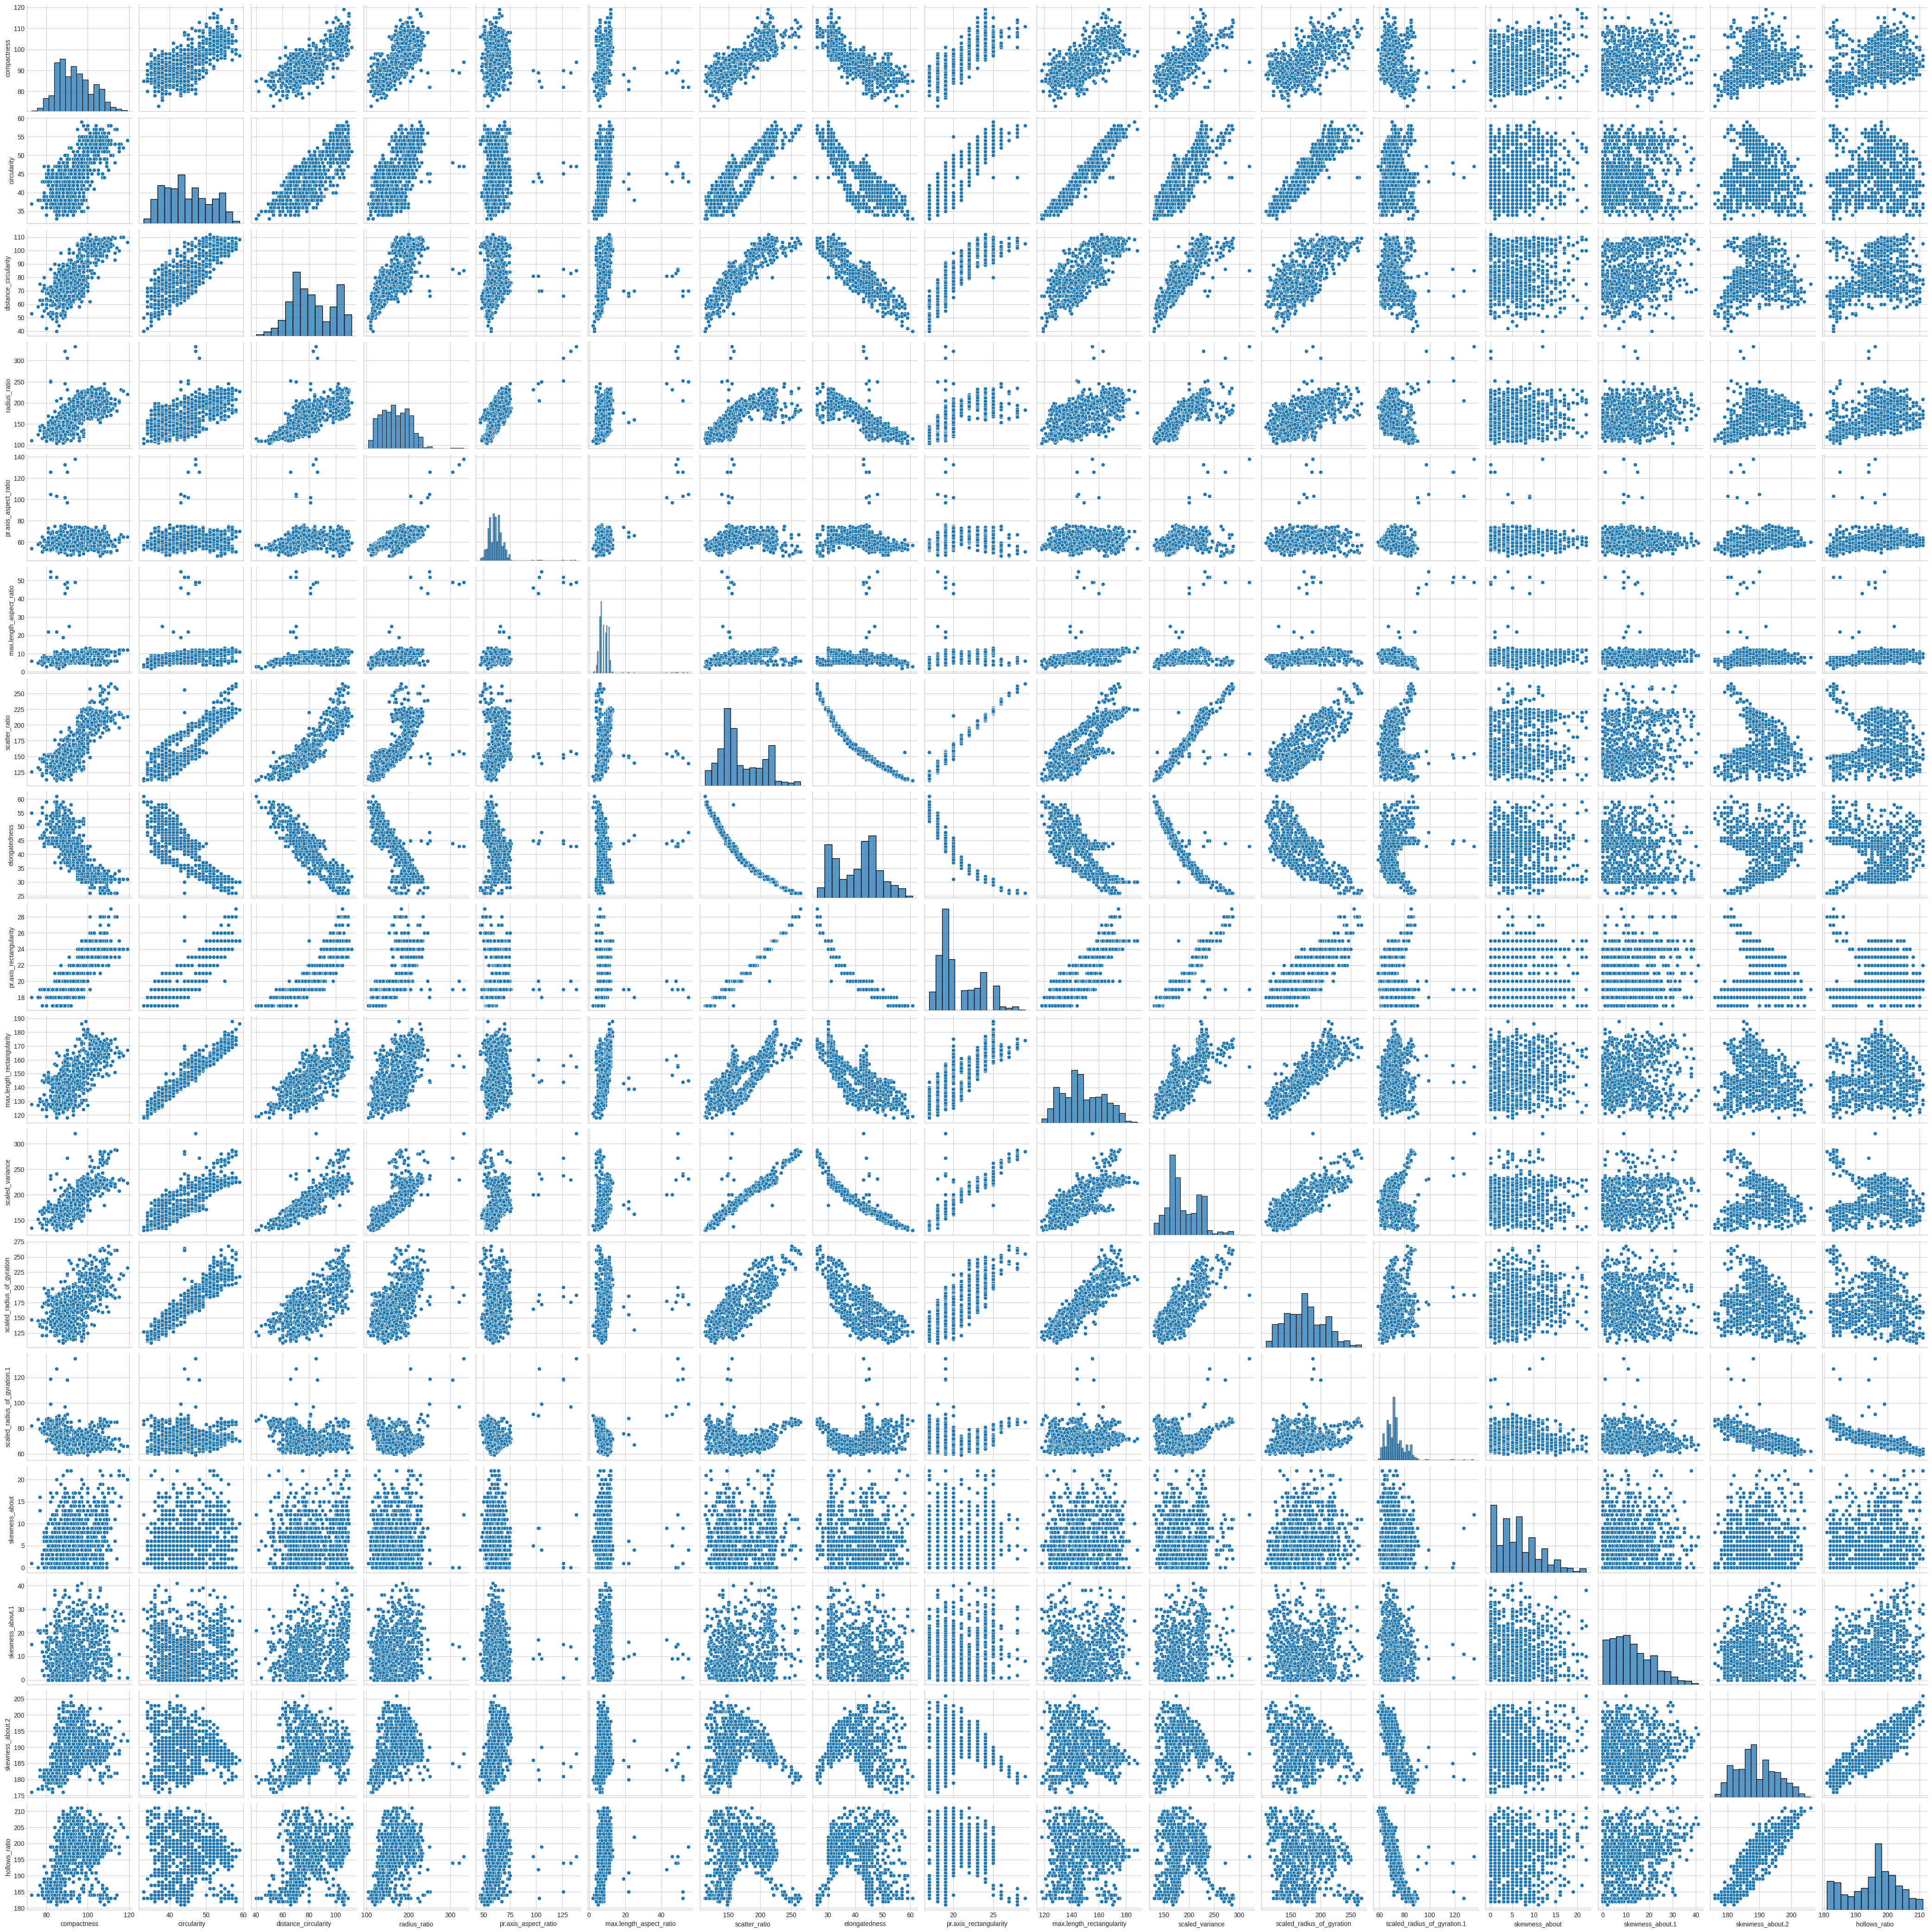

In [14]:
sns.pairplot(df)

In [15]:
cor

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                              0.015599       0.074458   
skewness_about.1                            0.043422       0.212428   
skewness_about.2                           -0.026081       0.005628   
hollows_ratio                               0.143919       0.118817   

                             elongatedness  pr.axis_rectangularity  \
compactness                      -0.788750        

In [17]:
# Normalization
from scipy.stats import zscore
new_df=df.iloc[:,:-1].apply(zscore)
new_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_radius_of_gyration  scaled_radius_of_gyration.1  \
0        -0.401920                   0.285705                    -0.327326   
1        -0.593357                  -0.513630                    -0.059384   
2         1.097671                   1.392477                     0.074587   
3        -0.912419                  -1.466683                    -1.265121   
4         1.671982                   0.408680                     7.309005   

   skewness_about  skewness_about.1  skewness_about.2  hollows_ratio  
0       -0.073812          0.380870         -0.312012       0.183957  
1        0.538390          0.156798          0.013265       0.452977  
2        1.558727         -0.403383         -0.149374       0.049447  
3       -0.073812         -0.291347          1.639649       1.529056  
4        0.538390         -0.179311         -1.450481      -1.699181

In [20]:
cov_mat=np.cov(new_df,rowvar=False)
cov_mat

array([[ 1.00118343,  0.68569786,  0.79086299,  0.69055952,  0.09164265,
         0.14842463,  0.81358214, -0.78968322,  0.81465658,  0.67694334,
         0.76297234,  0.58593517, -0.24988794,  0.23635777,  0.15720044,
         0.29889034,  0.36598446],
       [ 0.68569786,  1.00118343,  0.79325751,  0.6216467 ,  0.15396023,
         0.25176438,  0.8489411 , -0.82244387,  0.84439802,  0.96245572,
         0.79724837,  0.92691166,  0.05200785,  0.14436828, -0.01145212,
        -0.10455005,  0.04640562],
       [ 0.79086299,  0.79325751,  1.00118343,  0.76794246,  0.15864319,
         0.26499957,  0.90614687, -0.9123854 ,  0.89408198,  0.77544391,
         0.86253904,  0.70660663, -0.22621115,  0.1140589 ,  0.26586088,
         0.14627113,  0.33312625],
       [ 0.69055952,  0.6216467 ,  0.76794246,  1.00118343,  0.66423242,
         0.45058426,  0.73529816, -0.79041561,  0.70922371,  0.56962256,
         0.79435372,  0.53700678, -0.18061084,  0.04877032,  0.17394649,
         0.38266622

In [21]:
cov_mat.shape

(17, 17)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17)
pca.fit(new_df)

PCA(n_components=17)

In [23]:
print(pca.explained_variance_)

[8.48823464e+00 3.00516405e+00 1.87861536e+00 1.16882735e+00
 9.16865156e-01 5.25261265e-01 3.55927584e-01 2.21471984e-01
 1.59457077e-01 8.98508365e-02 6.27840317e-02 4.52946756e-02
 3.18219759e-02 2.71012651e-02 2.01982653e-02 1.78207279e-02
 5.42209949e-03]


In [25]:
print(pca.components_)

[[ 2.89640908e-01  3.09280604e-01  3.20973843e-01  2.85409009e-01
   9.22745498e-02  1.09280019e-01  3.30806053e-01 -3.29171274e-01
   3.27276465e-01  2.98800190e-01  3.23788257e-01  2.85814292e-01
  -2.47734198e-02  4.56989158e-02  6.00358054e-02  3.69538676e-02
   8.44746819e-02]
 [-1.20752989e-01  1.35083017e-01 -6.50333541e-02 -1.79828147e-01
  -1.12931632e-01  2.08176723e-02  5.50876952e-02  5.23708501e-03
   6.67087368e-02  1.25713925e-01  7.06132556e-02  2.18023602e-01
   4.91163121e-01 -5.32217522e-02 -1.24906626e-01 -5.40765746e-01
  -5.38030846e-01]
 [-1.32163284e-01 -4.74223464e-02 -6.97628399e-02  2.69378002e-01
   6.44307062e-01  5.87699785e-01 -1.10645866e-01  7.01134376e-02
  -1.22730890e-01 -3.97627433e-02  4.52093476e-02 -5.39752796e-02
   2.83362570e-01 -1.28742704e-01 -6.75617489e-02  1.63325097e-02
   4.32442239e-02]
 [ 6.76243824e-02  1.70643075e-01 -8.64653953e-02 -4.01961768e-02
   5.16041071e-02  4.00606106e-02 -1.08366637e-01  9.35752306e-02
  -1.05537919e-01  

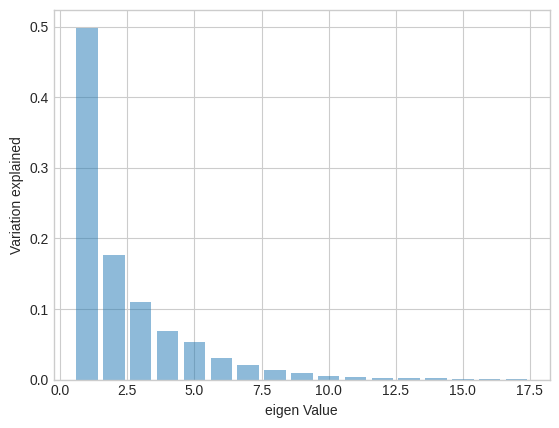

In [26]:
plt.bar(list(range(1,18)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

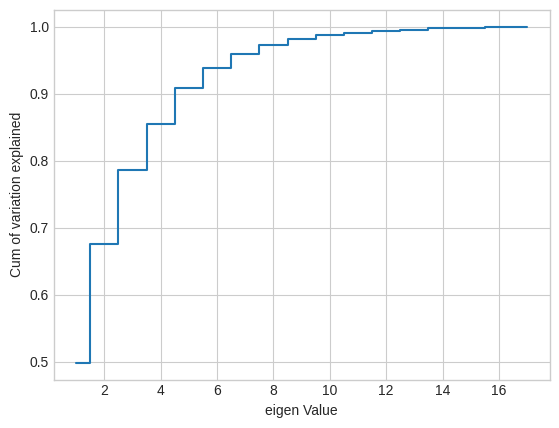

In [28]:
#Elbow visualisation of variance in the Eigen vectors

plt.step(list(range(1,18)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [31]:
#Dimensionality Reduction
#From 17 features we can reduce into 8 features which reasonable to contribut to the model performance.
new_pca = PCA(n_components=8)
new_pca.fit(new_df)
print(new_pca.components_)
print(new_pca.explained_variance_ratio_)
n_df = new_pca.transform(new_df)

[[ 0.28964091  0.3092806   0.32097384  0.28540901  0.09227455  0.10928002
   0.33080605 -0.32917127  0.32727647  0.29880019  0.32378826  0.28581429
  -0.02477342  0.04569892  0.06003581  0.03695387  0.08447468]
 [-0.12075299  0.13508302 -0.06503335 -0.17982815 -0.11293163  0.02081767
   0.0550877   0.00523709  0.06670874  0.12571392  0.07061326  0.2180236
   0.49116312 -0.05322175 -0.12490663 -0.54076575 -0.53803085]
 [-0.13216328 -0.04742235 -0.06976284  0.269378    0.64430706  0.58769979
  -0.11064587  0.07011344 -0.12273089 -0.03976274  0.04520935 -0.05397528
   0.28336257 -0.1287427  -0.06756175  0.01633251  0.04324422]
 [ 0.06762438  0.17064308 -0.0864654  -0.04019618  0.05160411  0.04006061
  -0.10836664  0.09357523 -0.10553792  0.17036837 -0.12697027  0.18479377
  -0.05860157  0.60033772 -0.68045941  0.11319105  0.0483511 ]
 [ 0.06853113 -0.08782011  0.03672894 -0.04607315 -0.03702533  0.21437768
  -0.01845134  0.07964557 -0.00082713 -0.06381463 -0.00245303 -0.06360792
   0.1468

In [32]:
n_df

array([[ 0.48084807, -0.17489417,  0.94143983, ..., -0.6858773 ,
        -0.90256494, -0.37766692],
       [-1.46845778, -0.43017412, -0.37257348, ..., -0.52638184,
         0.36309572,  0.24949352],
       [ 3.60583306,  0.23784893,  0.02099297, ...,  0.70214405,
        -0.00647137,  0.49590426],
       ...,
       [ 4.54270739,  0.04245581,  0.49820729, ..., -0.25180966,
         0.5538505 ,  0.10992941],
       [-3.15270251, -1.05311456, -0.26959074, ..., -0.36771144,
        -0.20636674,  0.32444233],
       [-4.60487852,  0.27062938, -0.48720017, ..., -0.33338949,
         0.04804648, -0.24688354]])

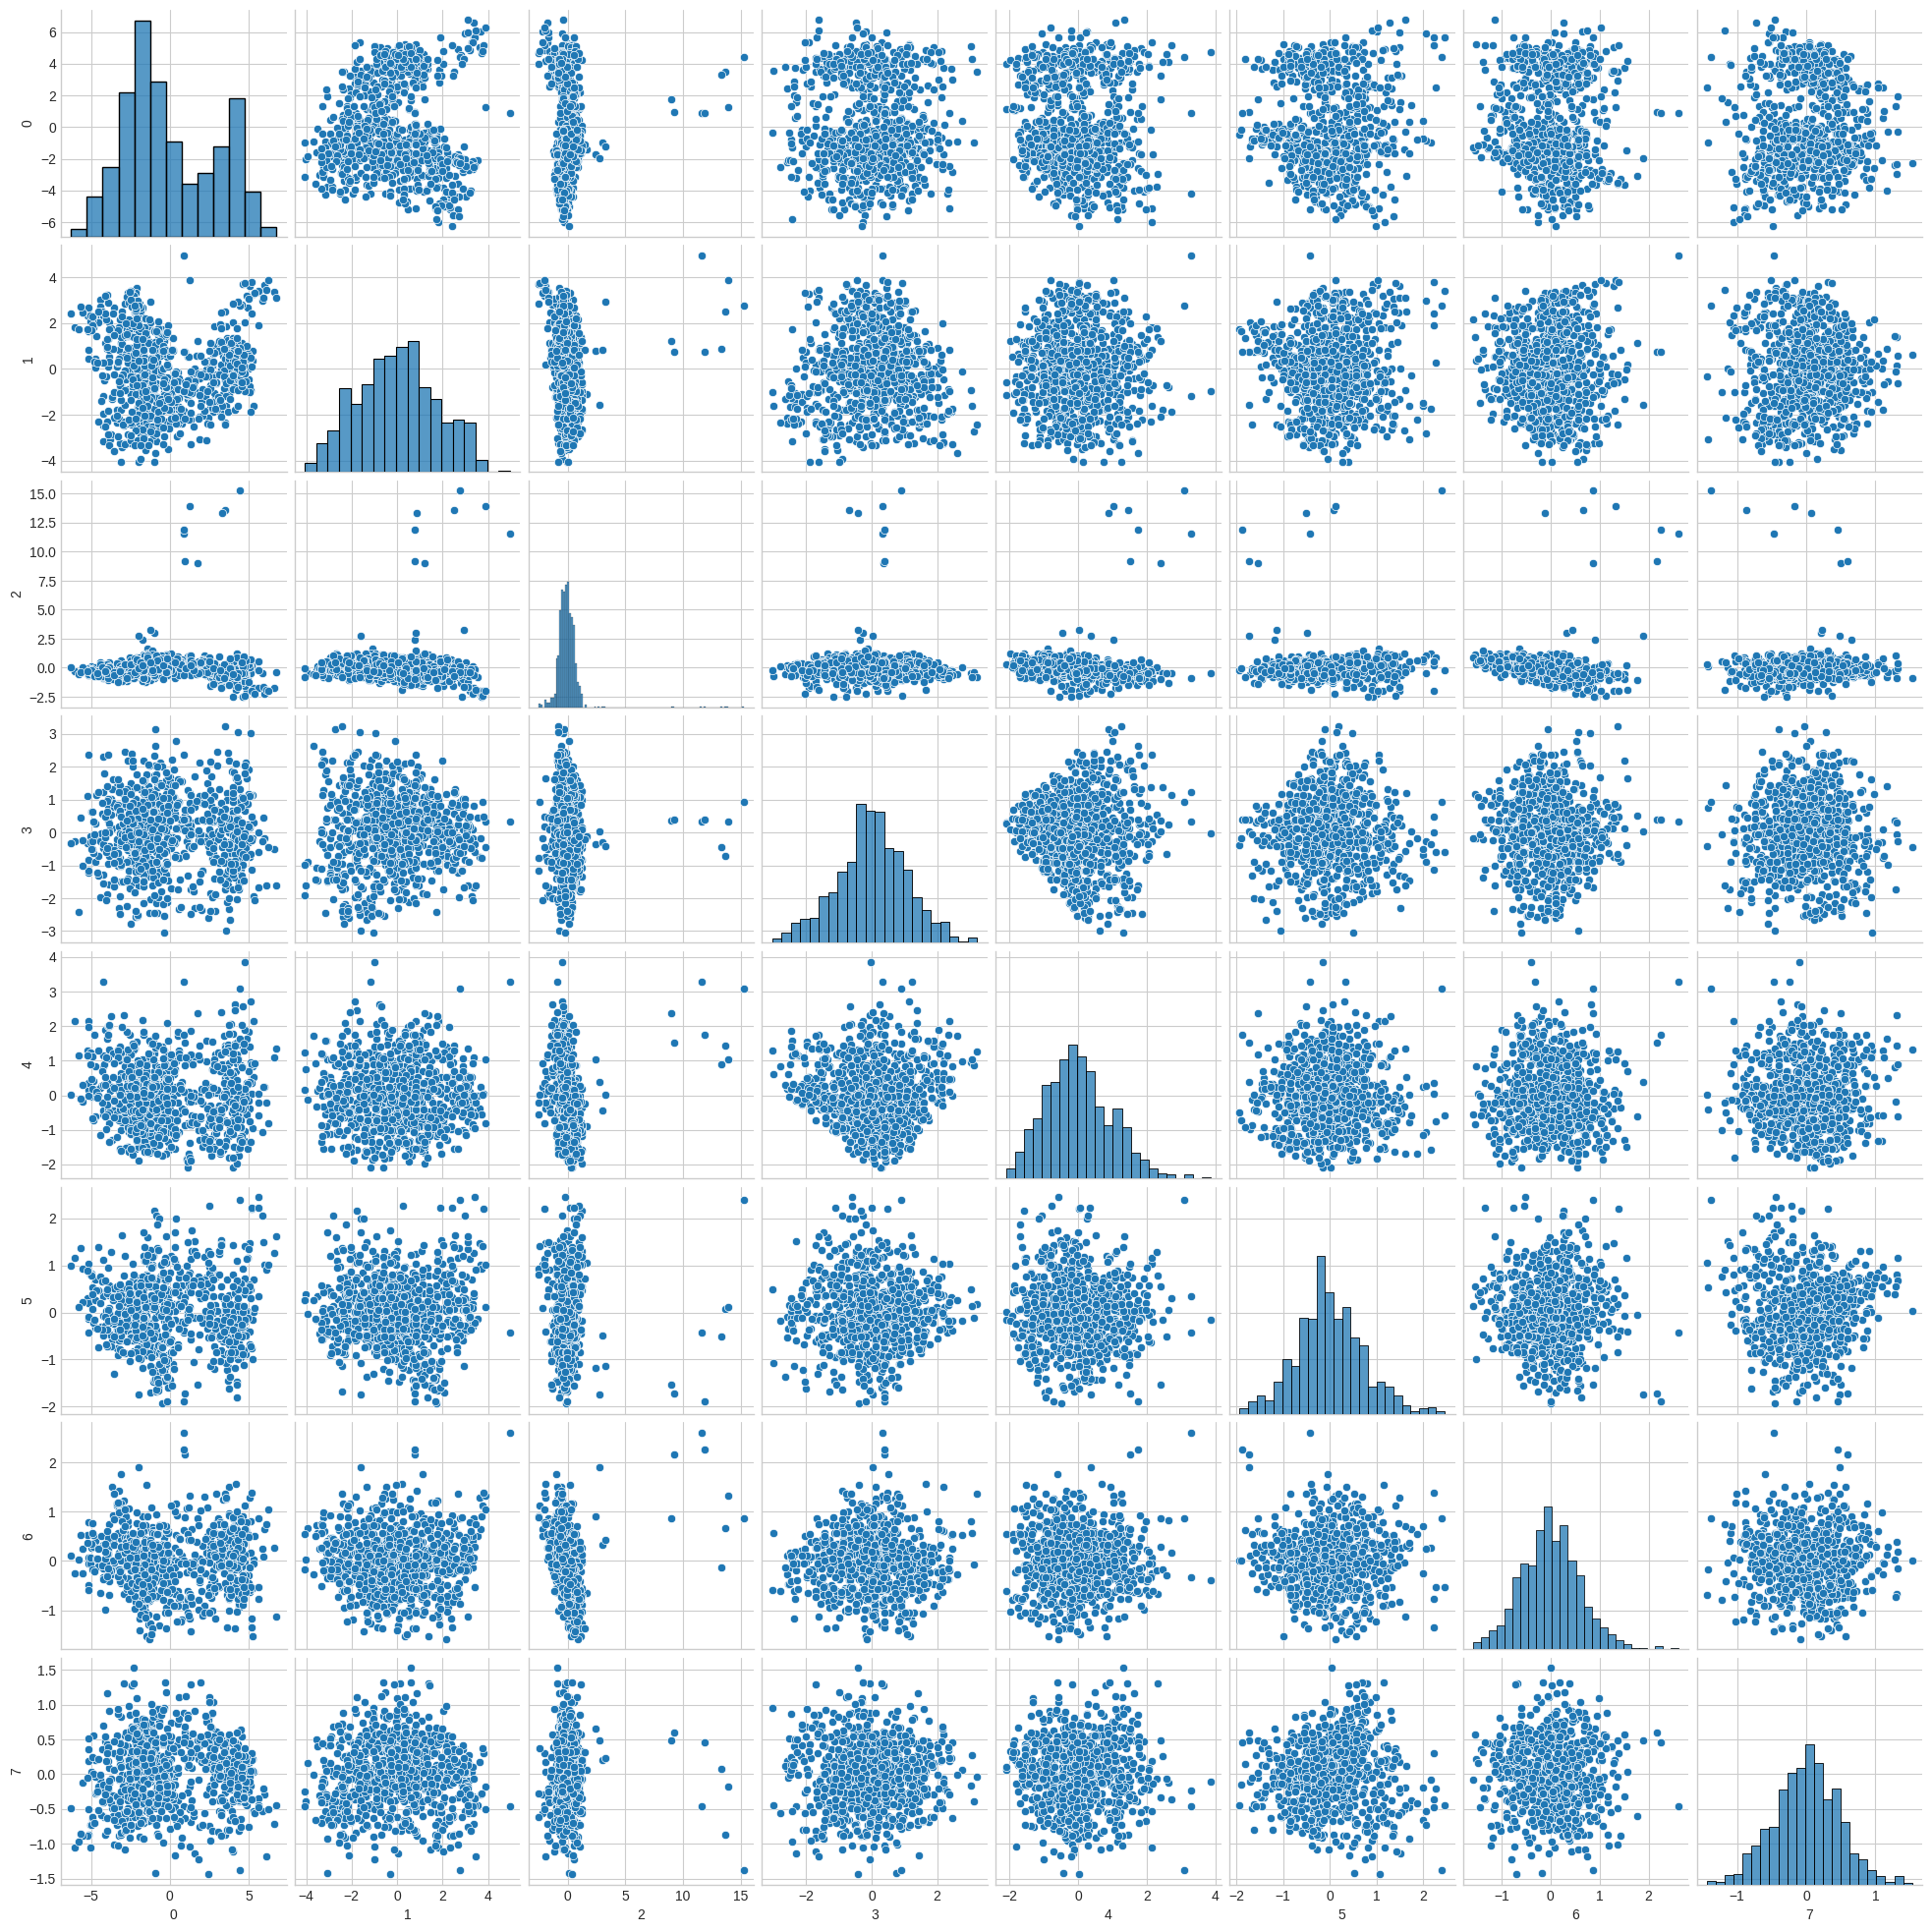

In [34]:
sns.pairplot(pd.DataFrame(n_df))

In [40]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
y=le.fit_transform(df.iloc[:,-1])
y.shape

(846,)

In [42]:
from sklearn.model_selection import KFold,train_test_split

x_train, x_test, y_train, y_test = train_test_split(n_df, y, test_size = 0.20, random_state = 14)

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [43]:
# Model Building
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [49]:
y_hat=svc.predict(x_test)
print(y_hat)

[2 2 1 1 0 0 1 2 1 1 1 1 1 1 1 2 1 1 0 1 1 2 2 2 1 1 0 1 1 0 2 1 1 1 2 1 0
 1 1 0 2 1 0 0 1 1 0 1 1 2 1 0 1 1 1 1 0 1 1 0 1 2 1 1 2 2 1 0 2 2 1 0 0 1
 0 2 0 1 0 1 2 1 1 0 2 1 2 1 0 2 1 1 1 0 2 0 1 0 2 1 2 1 2 2 1 1 1 2 1 1 1
 0 0 1 0 0 1 0 1 0 2 0 1 2 1 2 2 2 2 1 2 1 2 2 1 1 0 1 1 1 0 1 0 1 1 1 1 0
 0 0 0 0 1 1 0 2 1 0 1 2 1 1 1 1 1 1 1 1 1 2]


In [46]:
print(svc.score(x_train,y_train))
print(svc.score(x_test,y_test))

0.9630177514792899
0.9588235294117647


In [48]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

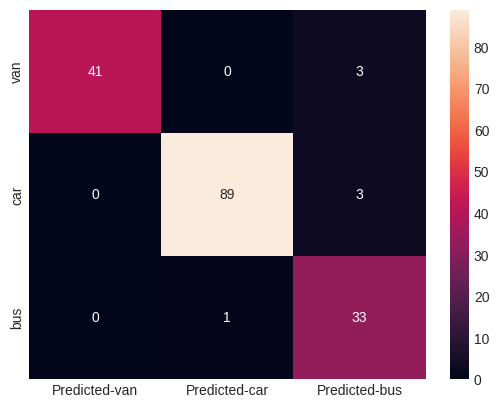

In [57]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_hat,labels=[0,1,2])
df_cm=pd.DataFrame(cm,index=['van','car','bus'],columns=['Predicted-van','Predicted-car','Predicted-bus'])
sns.heatmap(df_cm,annot=True)
plt.show()